In [1]:
# logistic regression for prediction of categorical outcome: 0 or 1 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns
sns.set()

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)

In [4]:
raw_data = pd.read_csv("/Users/yanhong/Desktop/statistics/Admittance.csv")

In [5]:
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [7]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [8]:
y = data['Admitted']
x1 = data['SAT']

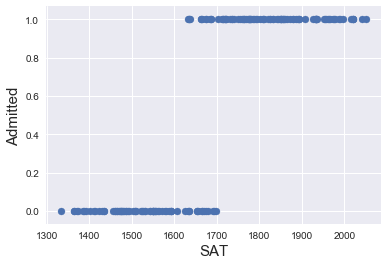

In [9]:
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT',fontsize=15)
plt.ylabel('Admitted', fontsize=15)
plt.show()

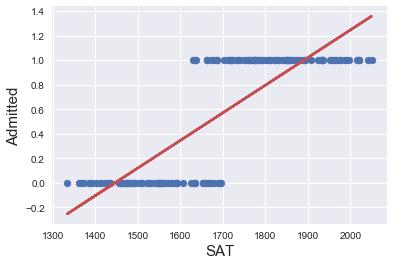

In [10]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y, color='C0')
y_hat = x1 * results_lin.params[1] + results_lin.params[0]

plt.plot(x1, y_hat, lw=2.5, color='C8')
plt.xlabel('SAT', fontsize=15)
plt.ylabel('Admitted', fontsize=15)
plt.show()

In [41]:
eg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [43]:
results_log.summary()
# MLE = Maximum Likelihood Estimation
# Likelihood function:
# a function which estimates how likely it is that the model at hand describes the real underlying relationship of the variables.
# The bigger Log-likelihood the higher prob that our model is correct
# LL-Null: log likelihood-null -> the log likelihood of a model which has no independent variables
# You may wanna compare the log-likelihood of your model with the LL-null to see if the model has any explanatory power.
# LLR (log likelihood ratio) measures if our model is statistically different from LL-null, a.k.a a useless model. 
# Pseudo R-squ = McFadden's R-squared: a good Psedudo R-squ is somewhere between 0.2 and 0.4

# log(pi / (1 - pi)) = -69.9128 + 0.0420 * SAT
# log (odds2/odds1) = 0.042
# e^(log(odds2/odds1)) = e^ 0.042
# odds2/odds1 = 1.042
# odds2 = 104.2% * odds1
# Odds 2 are 4.2% higher than odds1. 
# Conclusion: When the SAT score increases by 1, the odds of admittance increase by 4.2%. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Aug 2018   Pseudo R-squ.:                  0.7992
Time:                        23:50:47   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

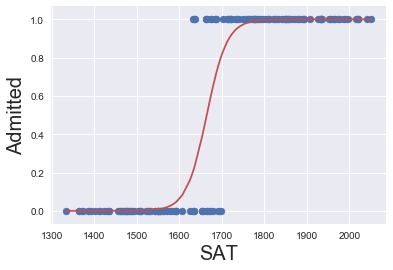

In [40]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))


plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()
# This plot shows the probability of admission given the SAT scores. 

In [35]:
# The logistic regression predicts the probability of an event occuring.
# Binary Prediction
# log[P(X) / (1-P(X))] = β0 + β1x1 + ...... + βkxk

In [44]:
raw_data = pd.read_csv("/Users/yanhong/Desktop/statistics/Binary predictors.csv")

In [11]:
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [49]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data['Gender'] = data['Gender'].map({'Female':1, 'Male':0})

In [50]:
y = data['Admitted']
x1 = data['Gender']

In [52]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


In [54]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Aug 2018   Pseudo R-squ.:                  0.1659
Time:                        23:58:11   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

In [102]:
# log(odds) = -0.6436 + 2.0786 * Gender
# log(odds female /odds male) = 2.08
np.exp(2.0786)

7.993270498536442

In [103]:
# odds female = 7.99 * odds male

In [104]:
## Two Variables Log Regression
y = data['Admitted']
x1 = data[['SAT','Gender']]

x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 13 Aug 2018   Pseudo R-squ.:                  0.8249
Time:                        00:38:00   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [64]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [65]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [66]:
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [67]:
cm_df = pd.DataFrame(results_log.pred_table())

In [71]:
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [72]:
# For 69 observations the model predicted 0 and the true value was 0
# For 90 observations the model predicted 1 and the true value was 1
# Accuracy = (69+90) / (69+5+4+90) = 159 / 168 = 94.6% 

In [75]:
cm = np.array(cm_df)
cm

array([[69.00, 5.00],
       [4.00, 90.00]])

In [79]:
accuracy_train = ((cm[0,0] + cm[1,1]) / cm.sum())
accuracy_train

0.9464285714285714

In [80]:
# Overfitting: Our training has focused on the particular training set so much, it has missed the point.
# The noise is also captured in the model
# high train accuracy
# low test accuracy

# Underfitting: The model has not captured the underlying logic of the data

In [97]:
# Testing is done on a dataset the model has never seen before
test = pd.read_csv("/Users/yanhong/Desktop/statistics/Test dataset.csv")

In [98]:
test['Admitted'] = test['Admitted'].map({'Yes':1, 'No':0})
test['Gender'] = test['Gender'].map({'Female':1, 'Male':0})
test.head()

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0


In [105]:
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
5,1.0,1755,1
6,1.0,1775,1
7,1.0,1887,1
8,1.0,1893,1
9,1.0,1580,0


In [110]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'], axis=1)
test_data = sm.add_constant(test_data)
test_data.head()

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0


In [111]:
def confusion_matrix(data, actual_values, model):
    
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

In [112]:
cm = confusion_matrix(test_data, test_actual, results_log)

In [113]:
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]), 0.8947368421052632)

In [116]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [117]:
print('Missclassification rate: ' +str((1+1)/19))

Missclassification rate: 0.10526315789473684
